In [26]:
#autoreload
%load_ext autoreload
%autoreload 2
import torch
import matplotlib.pyplot as plt
import numpy as np
import featureman.gen_data as man
import featureman.utils as utils
from sklearn.cluster import SpectralClustering
import pickle
from torch.utils.data import Dataset, DataLoader

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:
sae_dict = torch.load("sae_model.pth", map_location=device)
sae = man.BatchedSAE_Updated(input_dim=512, n_models=5, width_ratio=4).to(device)
sae.load_state_dict(sae_dict)

<All keys matched successfully>

In [44]:
decoder = sae.W_d[3]

#decoder normalize
decoder = decoder / decoder.norm(dim=1, keepdim=True)

all_sims = decoder @ decoder.T

all_sims.shape

torch.Size([2048, 2048])

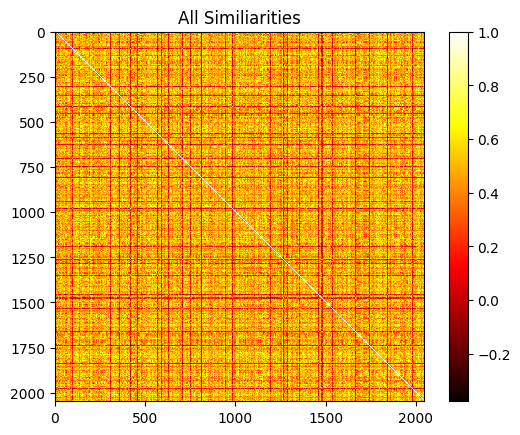

In [46]:
#imshow
plt.imshow(all_sims.cpu().detach().numpy(), cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title("All Similiarities")
plt.show()

In [34]:
utils.graph_cluster_sims(all_sims, top_k=1, sim_cutoff=0.99999, prune_clusters=True)

100%|██████████| 2048/2048 [00:00<00:00, 382642.19it/s]

Found 2 clusters with size < 3000 and > 1
Saved clusters to clusters_1_sim_cutoff_0.99999.pkl
